# Step 1: Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist
import keras

# Step 2: Load the Dataset

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#normalize the data (max of 0-255 ,so divide by 255)
x_train=x_train/255
x_test=x_test/255

In [3]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

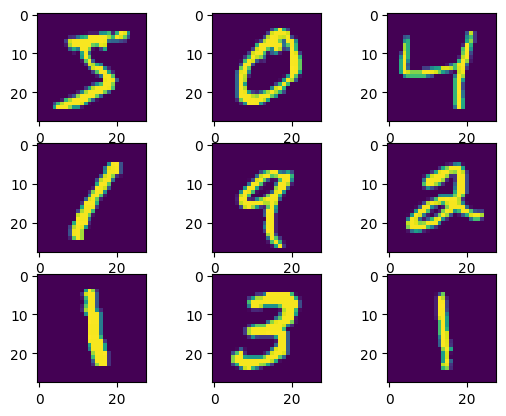

In [4]:
#my addition to the code
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i])
plt.show()


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

# Step 3: Define the network Architecture

In [8]:
model=Sequential() #Sequential as a feed forward network
model.add(keras.layers.Flatten(input_shape=(28,28)))  #Flatten the input(i.e. convett to 1-D array) and provide the input size to the input layer
model.add(keras.layers.Dense(256,activation='relu'))  #Define the hidden layer with 128 nodes (<than 28x28) with Relu as activation function
model.add(keras.layers.Dense(10,activation='softmax'))#Define the output layer with 10 nodes (number of classes=10) with softmax activation function


# Step 4: Train the Model

In [9]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #Compile the model using the SGD optimizer and metric accuracy
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=2) #Fit the model for the training set and also providing the validation set and number of epochs

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7457 - loss: 1.0053 - val_accuracy: 0.9068 - val_loss: 0.3492
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9046 - loss: 0.3497 - val_accuracy: 0.9219 - val_loss: 0.2856


# Step 5: Evaluate the model

In [10]:
test_loss,test_acc=model.evaluate(x_test,y_test) #evaluate the modelfor the test set
#Print the accuracy and the loss of the model
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9088 - loss: 0.3291
Loss=0.286
Accuracy=0.922


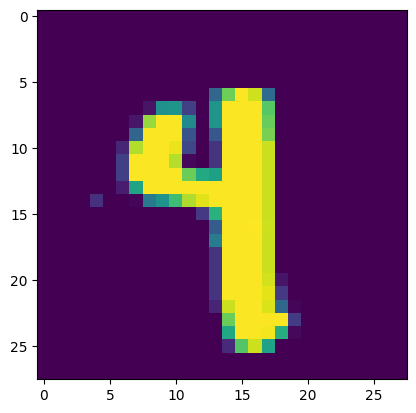

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Digit is :  9


In [11]:
#Randomly choose any image from the test test and evaluate the predict of the model
import random
n=random.randint(0,9999) # choose random number between 0-9999
plt.imshow(x_test[n]) #display that image
plt.show()
pred=model.predict(x_test) #predict the output using the model
print("Digit is : " ,np.argmax(pred[n])) # print output

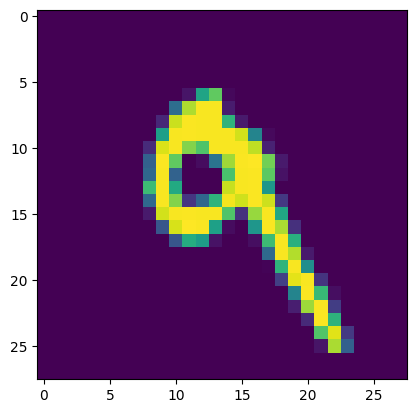

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Digit is :  9


In [12]:
plt.imshow(x_test[7]) #display that image
plt.show()
pred=model.predict(x_test) #predict the output using the model
print("Digit is : " ,np.argmax(pred[7])) # print output

# Step 6: Plot the accuracy and loss Graphs

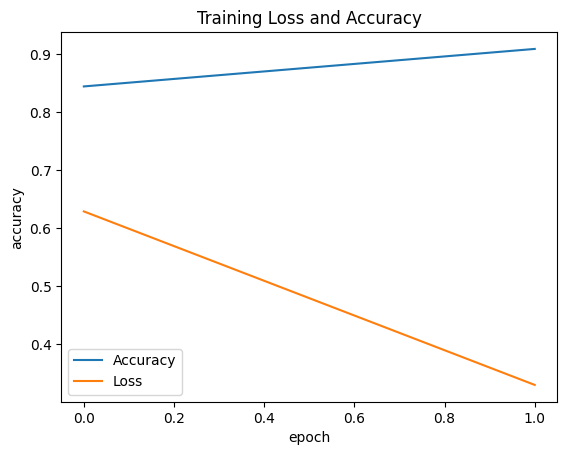

In [13]:
plt.plot(H.history['accuracy']) #get the accuracy for the training set from the model's history attribute
plt.plot(H.history['loss'])   #get the loss for the training set from the model's history attribute
plt.title('Training Loss and Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'])

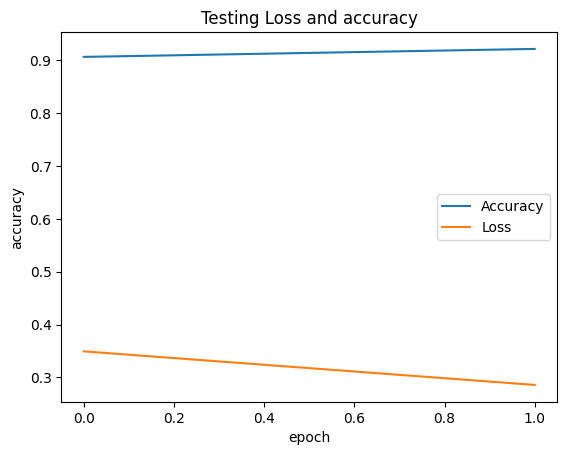

In [14]:
plt.plot(H.history['val_accuracy']) #get the accuracy for the validation set from the model's history attribute
plt.plot(H.history['val_loss']) #get the loss for the validation set from the model's history attribute
plt.title('Testing Loss and accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'])

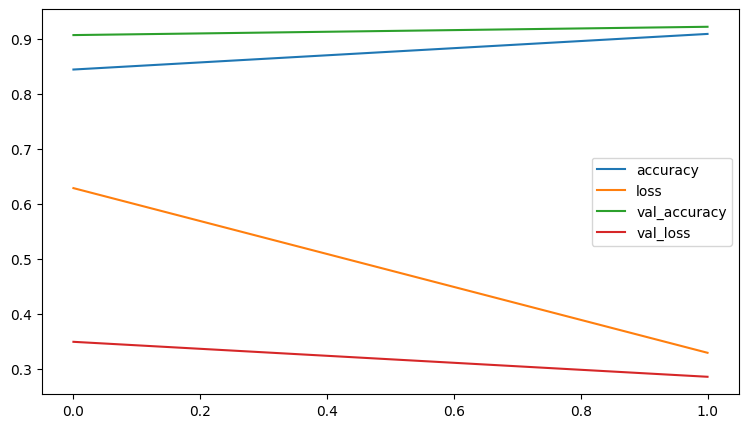

In [17]:
pd.DataFrame(H.history).plot(figsize=(9,5))
plt.show()
